<a href="https://colab.research.google.com/github/MehediAzim/DL-pytorch/blob/main/Tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Tensors and Basic Neural Network**

# Tensors

* A torch, tensor is a multidimensional matrix containing elements of single data type
* Similar to numy arrays but more powerful
* Sefault data type of float32


In [3]:
import torch
import numpy as np

In [4]:
tensor1 = torch.randn(2,2)
tensor1

tensor([[-0.8101,  2.1457],
        [ 0.6409,  0.9364]])

In [6]:
tensor3d = torch.randn(3,3,3)
tensor3d

tensor([[[ 0.9946, -0.1593,  1.3489],
         [ 1.0745,  0.3757,  1.4025],
         [-0.1503, -0.3535, -1.2305]],

        [[ 0.3207,  0.1802, -0.5413],
         [ 0.3660, -0.6127,  0.9650],
         [ 0.9876, -0.8459, -1.1405]],

        [[-1.2837,  2.4697, -1.5071],
         [ 0.3851,  0.5835,  0.2855],
         [-0.3941,  1.8577,  0.8096]]])

In [8]:
#create tensor out of numpy array
my_tensor = torch.tensor(np.array([[1,2,3],[4,5,6]]))
my_tensor

tensor([[1, 2, 3],
        [4, 5, 6]])

In [9]:
my_tensor.dtype

torch.int64

In [10]:
my_tensor = my_tensor.type(torch.float32)
my_tensor.dtype

torch.float32

# Reshape and slices

In [12]:
torch_d = torch.arange(10)
torch_d

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [13]:
shaped = torch_d.reshape(2,5)
shaped

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [14]:
torch_d2 = torch.arange(10)
torch_d2

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
shaped2 = torch_d2.view(2,-1) #assuming we don't know the number of items in the list
shaped2

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [16]:
shaped2 = torch_d2.view(5,2)
shaped2

tensor([[0, 1],
        [2, 3],
        [4, 5],
        [6, 7],
        [8, 9]])

In [17]:
torch3 = torch.arange(10)
torch3

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
torch4 = torch3.view(2,-1)
torch4

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

In [22]:
torch3[1] = 2222
torch3

tensor([   0, 2222,    2,    3,    4,    5,    6,    7,    8,    9])

In [23]:
torch4 #changing original tensor will reflected in the reshaped/ view tensor

tensor([[   0, 2222,    2,    3,    4],
        [   5,    6,    7,    8,    9]])

In [24]:
#slices
torch3[7] #will grab  a tensor/ specific item

tensor(7)

In [25]:
torch4[:,1]

tensor([2222,    6])

# Math operations

In [27]:
  ten1 = torch.arange(3)
  ten2 = torch.arange(4,7)
  print(ten1)
  print(ten2)

tensor([0, 1, 2])
tensor([4, 5, 6])


In [29]:
ten1 + ten2

tensor([4, 6, 8])

In [28]:
torch.add(ten1,ten2)

tensor([4, 6, 8])

In [31]:
ten2 - ten1

tensor([4, 4, 4])

In [32]:
torch.sub(ten2,ten1)

tensor([4, 4, 4])

In [33]:
torch.mul(ten1,ten2)

tensor([ 0,  5, 12])

In [34]:
torch.div(ten2,ten1)

tensor([inf, 5., 3.])

In [36]:
ten1[0] = 100
ten1

tensor([100,   1,   2])

In [37]:
torch.remainder(ten2,ten1)

tensor([4, 0, 0])

In [38]:
torch.pow(ten1,ten2)

tensor([100000000,         1,        64])

In [39]:
ten1.add(ten2) #works for other operations too

tensor([104,   6,   8])

In [40]:
ten1.add_(ten2) #reassigning to the ten1 variable; _ after the add does that
ten1

tensor([104,   6,   8])

# Basic Neural Network

In [74]:
#import libraries
import torch
import torch.nn as nn
import torch.nn.functional as F

In [97]:
#creating model class
class Net(nn.Module):
  # input layer: 4 features of the flower
  # hidden layers
  # output layers: 3 classes of iris flower
    def __init__(self, in_features=4, h1=8, h2=9, out_features=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features, h1)
        self.fc2 = nn.Linear(h1, h2)

        self.out = nn.Linear(h2, out_features)


    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [98]:
# peak a manual seed for randomaization
torch.manual_seed(42)
model = Net()

In [99]:
#Load dataset

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [101]:
df.head(4)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa


In [102]:
df['species'] = df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})
df.head(4)

<ipython-input-102-41f5f25ab28a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace({'setosa':0, 'versicolor':1, 'virginica':2})


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0


In [103]:
#Train test

X = df.drop('species', axis=1).values
y = df['species'].values

print(X[:5], y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] [0 0 0 0 0]


In [104]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 41)

In [105]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [106]:
x_train = torch.FloatTensor(x_train)
x_test = torch.FloatTensor(x_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [110]:
#set the criterion of model to measure the error, how far off the prediction are from the real data
criterion =nn.CrossEntropyLoss()
#Chossing optimizer, learning rate
optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)

In [111]:
#train our model

epochs =200
losses = []
for i in range(epochs):
  #go forward and get a prediction
  y_pred = model.forward(x_train)

  #measure the loss
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i}, Loss: {loss}')

  #backpropagation: take the error rate of forward propagation and feed it back
  #through the network to fine tune the weights
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0, Loss: 0.6920521855354309
Epoch: 10, Loss: 0.5240362882614136
Epoch: 20, Loss: 0.37893256545066833
Epoch: 30, Loss: 0.24420683085918427
Epoch: 40, Loss: 0.13751116394996643
Epoch: 50, Loss: 0.08126845955848694
Epoch: 60, Loss: 0.057472825050354004
Epoch: 70, Loss: 0.04563320800662041
Epoch: 80, Loss: 0.03893914446234703
Epoch: 90, Loss: 0.03586822375655174
Epoch: 100, Loss: 0.031737495213747025
Epoch: 110, Loss: 0.028943879529833794
Epoch: 120, Loss: 0.02690354734659195
Epoch: 130, Loss: 0.0252973809838295
Epoch: 140, Loss: 0.02385208010673523
Epoch: 150, Loss: 0.022594111040234566
Epoch: 160, Loss: 0.021438797935843468
Epoch: 170, Loss: 0.020362908020615578
Epoch: 180, Loss: 0.01935778185725212
Epoch: 190, Loss: 0.018501024693250656


Text(0.5, 0, 'Epoch')

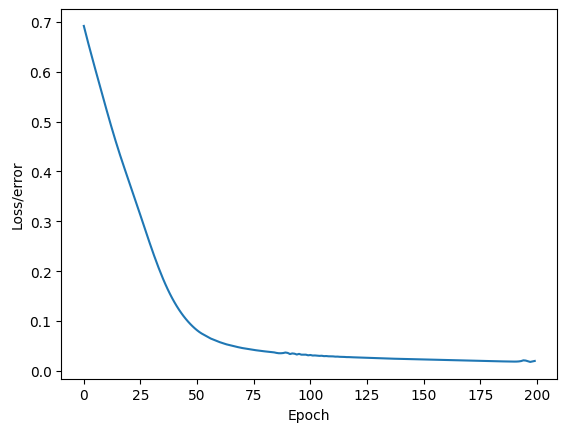

In [112]:
#plot the loss
plt.plot(range(epochs), losses)
plt.ylabel("Loss/error")
plt.xlabel("Epoch")
# plt.show()

In [113]:
#Evaluate model on test dataset
with torch.no_grad(): #turning of back propagation
  y_eval = model.forward(x_test)
  loss = criterion(y_eval, y_test)

print(f'Loss on test data: {loss}')


Loss on test data: 0.1802326738834381


In [119]:
new_iris = torch.tensor([[5.1, 3.5, 1.4, 0.2]])
with torch.no_grad():
  # for i, data in enumerate(x_test):
  #   y_eval = model.forward(data)
  #   print(f'{i+1}: {y_test[i]}-{y_eval.argmax()}')
  print(model(new_iris))

tensor([[ 15.3424,   7.9064, -15.9804]])
